# 练习1：线性回归
----------
## 介绍

在本练习中，您将 实现线性回归并了解其在数据上的工作原理。

在开始练习前，需要**下载如下的文件进行数据上传**：

- ex1data1.txt -单变量的线性回归数据集
- ex1data2.txt -多变量的线性回归数据集

在整个练习中，涉及如下的**必做作业**，及标号`*`的**选做作业**：

- [实现简单示例函数](#1)----------（5分）
- [实现数据集显示的函数](#2)-------（5分）
- [计算线性回归成本的函数](#3)-----（40分）
- [运行梯度下降的功能函数](#4)-----（50分）
- [数据标准化*](#5)
- [多变量线性回归的梯度下降功能实现*](#6)

必做作业为实现单变量的线性回归；选做作业为实现多变量线性回归。


## 1 实现简单示例函数

在该部分练习中,将通过代码实现返回一个`5*5`的对角矩阵。输出与如下相同：
```shell
1 0 0 0 0
0 1 0 0 0
0 0 1 0 0
0 0 0 1 0
0 0 0 0 1
```

### 1.1 提交解决方案<span id="1"></span>

在以下代码框中进行如上的实现，完成部分练习后，得到如上的相同结果即为通过。

In [1]:
###在这里填入代码###
import numpy as np

A = np.eye(5)
print(A)


[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


## 2 单变量线性回归

在该部分练习中，将实现单变量线性回归并用来预测餐车的利润。

假设你是一家餐厅的领导，正在考虑在不同的城市开设新的分店。该连锁店已经在不同的城市有了餐车，并且你能够获得每个城市的人口和利润数据。

现在需要使用这些数据来帮助你选择下一个被扩展的城市。

文件`ex1data1.txt`包含线性回归问题的数据集。第一列数据对应城市人口，第二列数据对应那座城市的餐车的利润。利润为负时表示亏损。

### 2.1 绘制数据<span id='2'></span>

在开始进入练习之前，对数据进行可视化通常很有用。对于该数据集，可以使用散点图进行可视化，因为它只有两个属性（人口、利润）。

In [2]:
# 引入所需要的库文件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [3]:
# 数据存储路径
path = 'ex1data1.txt'

# 读入相应的数据文件
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

#查看数据的前五条
data.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


接下来需要实现数据可视化的代码，该部分数据绘制出的图像应与如下相同。

**要点：**
- 实现散点图可视化
- 数据分布为红色点
- 标清横纵坐标名称

![](1-1.png)

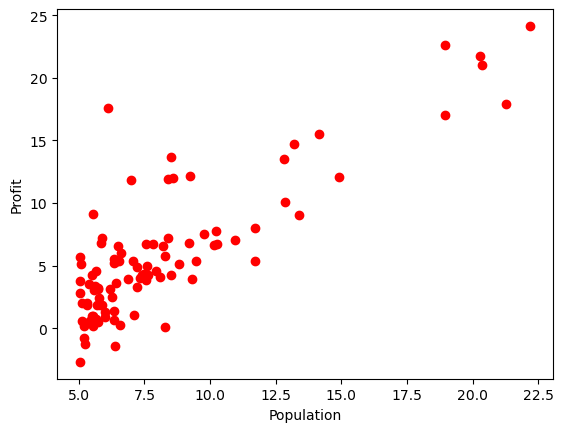

In [4]:
###在这里填入代码###

# 绘制散点图
plt.scatter(data['Population'], data['Profit'], color='red')

# 标清横纵坐标名称
plt.xlabel('Population')
plt.ylabel('Profit')

# 显示图表
plt.show()

### 2.2 梯度下降

在该部分中，将使用梯度下降来选择合适的线性回归参数θ用以拟合给定数据集。

#### 2.2.1 更新公式

线性回归的目的是最小化成本函数：
![](1-2.png)
假设$h_{\theta}(X)$由以下线性模型给出：
![](1-3.png)

回顾一下，模型的参数是$\theta_j$的值，这些将用来调整以最小化成本$J(\theta)$。

其中一种方法是使用批量梯度下降算法，在批量梯度下降中，每次迭代地执行更新，随着梯度下降的每一步计算，参数$\theta_j$越来越接近能够使得成本$J(\theta)$达到最低的最佳值。

![](1-4.png)(同时更新所有的$\theta_j$）

#### 2.2.2 实现

在上一部分的练习中，我们已经将所需要用到的数据加载至变量`data`中，并为其列分别进行命名。

接下来，我们在数据中添加了一个维度来拟合截距项$\theta_0$。并将初始参数值设为0，学习率$\alpha$设为0.01。


In [5]:
#在列索引为0处添加数据列，该列值均为1
data.insert(0, 'Ones', 1)

#获取数据列数
cols = data.shape[1]

#对变量X和y进行初始化,并将其数据类型转换为矩阵
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]
X = np.matrix(X.values)
y = np.matrix(y.values)

#学习率、迭代次数的初始化
alpha = 0.01
iterations = 1500

#### 2.2.3 计算成本J(θ)<span id='3'></span>

在执行梯度下降最小化成本函数$J(\theta)$时，通过计算成本来监视收敛状态是有帮助的。

在该部分练习任务中，**你需要实现一个计算成本$J(\theta)$的函数`computeCost`**，用于检查梯度下降实现的收敛性。

其中，`X`和`y`不是标量值，而是矩阵，其行代表训练集中的示例。

**要点：**
完成该函数后，将$\theta$值初始化为0并进行成本的计算，将得到的成本值打印出来。

如果结果为32.07，则计算通过。

In [6]:
###在这里填入代码###

def computeCost(X, y, theta=np.matrix(np.array([0, 0]))):
    #计算样本数量
    m = len(y)
    #计算成本
    J = np.sum(np.power((X * theta.T - y), 2)) / (2 * m)
    return J


computeCost(X, y)

32.072733877455676

#### 2.2.4 梯度下降<span id='4'></span>

接下来，我们将实现梯度下降，给出的代码已经实现了循环结构，你只需要在每次的迭代中提供$\theta$的更新。

在进行代码实现时，请确保你了解要优化的内容，和正在更新的内容。

>请记住，成本$J(\theta)$为参数-被向量$\theta$终止，而不是$X$和$y$。也就是说，我们将$J(\theta)$的值最小化通过改变矢量$\theta$的值，而不是通过改变$X$或$y$。

验证梯度下降是否正常工作的一种好方法是查看$J(\theta)$的值，并检查该值每步是否减小。每次迭代时，代码都会调用`computeCost`函数并打印成本。假设你实现了梯度下降，正确地计算成本，$J(\theta)$值永远不会增加，并且应该在算法结束时收敛到稳定值。

**要点：**

实现梯度下降后，需要使用最终的参数值将线性回归的拟合结果进行可视化，绘图结果需要类似如下图所示。
![](1-5.png)


In [7]:
###在这里填入代码###

def gradientDescent(X, y, theta, alpha):
    error = (theta * X.T) - y.T
    error_sum0 = np.sum(error) / len(X)
    error_sum1 = np.sum(error * X[:, 1]) / len(X)

    temp = np.matrix(np.zeros(theta.shape))
    temp[0, 0] = theta[0, 0] - alpha * error_sum0
    temp[0, 1] = theta[0, 1] - alpha * error_sum1
    theta = temp
    return theta


cost = np.zeros((iterations, 1))
theta = np.matrix(np.array([0, 0]))
theta_all = theta

for i in range(iterations):
    cost[i] = computeCost(X, y, theta)
    theta = gradientDescent(X, y, theta, alpha)
    theta_all = np.row_stack((theta_all, theta))
g = np.delete(theta_all, 0, 0)

In [8]:
# 计算最终的参数所得到的成本值
computeCost(X, y, g)

7112.561685267237

<Figure size 640x480 with 0 Axes>

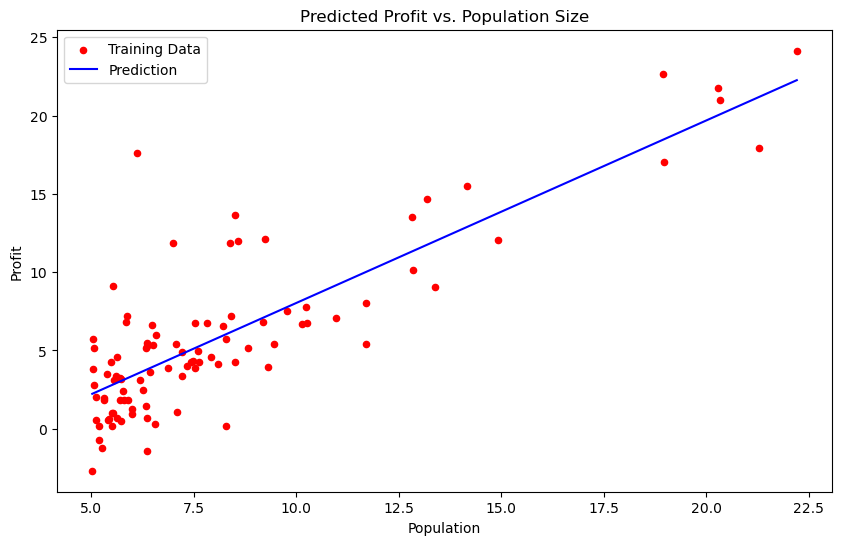

In [9]:
###在这里填入代码###
#对拟合曲线进行绘制
xx = np.linspace(data.Population.min(), data.Population.max(), 100)

f = theta[0, 0] + theta[0, 1] * xx

plt.figure()
data.plot(kind='scatter', x='Population', y='Profit', color='red', figsize=(10, 6), label="Training Data")
plt.plot(xx, f, color='blue', label="Prediction")
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend(loc='best')
plt.title('Predicted Profit vs. Population Size')
plt.show()


### 2.3 可视化成本函数

为了更好地理解成本函数的迭代计算，将每一步计算的cost值进行记录并绘制。

Text(0.5, 1.0, 'Error vs. Training Epoch')

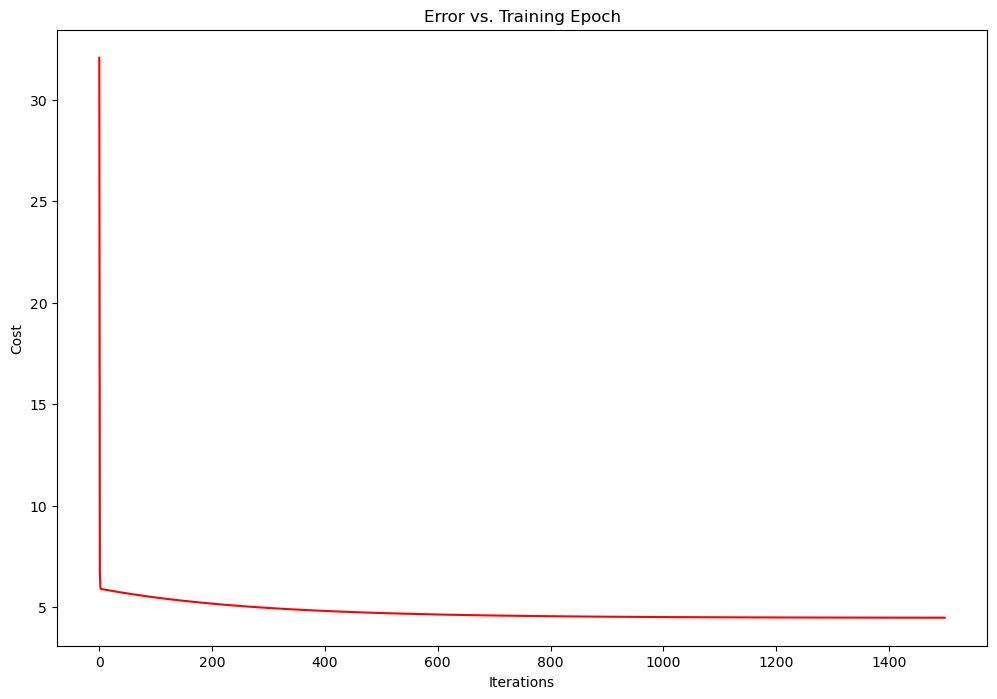

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iterations), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

## 选做练习
-------

## 3 多变量线性回归

在该部分中，将使用多个变量来实现用线性回归预测房屋价格。假设你目前正在出售房屋，想知道什么是好的市场价格。

一种方法是首先收集最近出售房屋的信息，其次是建立房屋价格模型。

文件`ex1data2.txt`包含俄勒冈州波特兰市的房屋价格及相关信息。第一列是房屋的大小（以平方英尺为单位），第二列是卧室的个数，第三列是房屋的价格。

### 3.1 特征标准化

以下代码将从文件`ex1data2.txt`文件中加载并显示该数据集。

通过观察这些数据，可以发现房屋的大小大约是卧室数量的1000倍。而当不同的特征值之间相差几个数量级时，将**特征进行缩放可以使梯度下降收敛得更快**。

In [11]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


<span id='5'></span>
在该部分练习中，你的任务是**编写代码并实现数据集中的数据标准化**。

**要点**：
- 从数据集中减去每个特征的平均值。
- 减去平均值后，再将新的特征值除以各自的“标准差”

标准差是一种衡量特定特征的值的范围内有多大变化的方法（大多数数据点将位于平均值的两个标准差内）；这是取值范围的替代方法。

当标准化特征时，需要存储用于标准化的值——平均值和标准差。从模型中学习参数后，经常需要预测新的房屋的价格。此时给定一个新的$x$值（房屋面积和卧室数量），必须首先使用先前从训练集中计算的平均值和标准差来对新的数据进行标准化。

In [12]:
###在这里填入代码###

data2_normalized = (data2 - data2.mean()) / data2.std()
data2_normalized

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389
5,-0.019732,1.090417,-0.323998
6,-0.587240,-0.223675,-0.204036
7,-0.721881,-0.223675,-1.130948
8,-0.781023,-0.223675,-1.026973
9,-0.637573,-0.223675,-0.783051


#### 3.2 梯度下降<span id='6'></span>

在之前的练习中，我们使用单变量线性回归实现了梯度下降的问题。在该部分联系中，唯一的区别是，此时我们的数据变为矩阵$X$。

假设函数和批次梯度下降的更新规则保持不变，你的任务是**代码实现多变量线性回归的成本函数和梯度下降**。

**要点**：
- 确保你的代码中可以支持任何大小的数据，并且数据均已被向量化。
- 代码实现成本函数和梯度下降后，最终的成本值应大约为0.13。
- 请依照单变量线性回归练习中要求，绘制成本的变化曲线。


Final cost: 0.13068670606095903


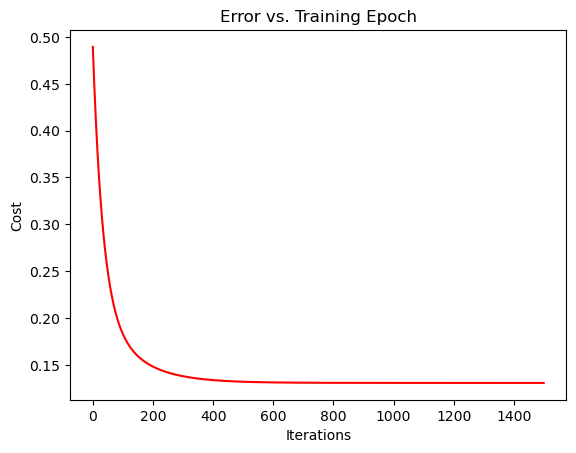

In [13]:
###在这里填入代码###

import numpy as np

def computeCostMulti(X, y, theta):
    m = len(y)
    J = np.sum(np.power((X @ theta - y), 2)) / (2 * m)
    return J

def gradientDescentMulti(X, y, theta, alpha):
    m = len(y)
    error = X @ theta - y
    theta -= (alpha / m) * (X.T @ error)
    return theta

# Add intercept term to X
data2_normalized.insert(0, 'Ones', 1)

# Separate X and y
cols = data2_normalized.shape[1]
X2 = data2_normalized.iloc[:, 0:cols-1]
y2 = data2_normalized.iloc[:, cols-1:cols]

# Convert to matrices
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.zeros((X2.shape[1], 1)))

cost2 = np.zeros(iterations)
for i in range(iterations):
    cost2[i] = computeCostMulti(X2, y2, theta2)
    theta2 = gradientDescentMulti(X2, y2, theta2, alpha)

# Print the final cost
print('Final cost:', computeCostMulti(X2, y2, theta2))

# Plot the convergence graph
plt.plot(np.arange(iterations), cost2, 'r')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Error vs. Training Epoch')
plt.show()